In [1]:
import numpy as np
import matplotlib.pyplot as plt

# RNN 이용 주가 예측

### 딥러닝(심층신경망)

2006년 제프리 힌트 교수의 "신경망으로 데이터 차원 줄이기 Reducing the dimensionality of data with neural networks" 논문이 발표되며 심층 신경망도 과적합 없이 빠른 학습이 가능함이 알려졌다. 이 논문은 MINIST 손글씨 숫자 데이터를 98.4% 수준으로 인식할 수 있다고 했다. 이때부터 딥러닝이란 용어가 사용되었다.

이후 일정한 확률에 다라 퍼셉트론을 무작위로 제거해서 과적합을 더 효과적으로 방지할 수 있는 드롭아웃 개념이 나오고 컴퓨팅 파워 증가로 빅데이터 처리가 되며 딥러닝 과 머신러닝이 발전하고 있다.

기본 머신러닝은 사람이 학습할 데이터 특징(라벨)을 설계했지만 딥러닝은 사람의 개입을 배제할 수 있게 되었다.

# 텐서플로우

tf2 부터 더 높은 수준의 API인 keras 를 사용해서 편리하게 텐서플로우를 사용할 수 있다.

In [2]:
import matplotlib.pylab as plt
import tensorflow as tf

tf.__version__

'2.5.0'

tf2부터 print로 객체를 확인해 볼 수 있다.

In [19]:
hello = tf.constant('Hello TF2')
print(hello)

tf.Tensor(b'Hello TF2', shape=(), dtype=string)


2021-09-30 14:48:35.028299: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 텐서 차원

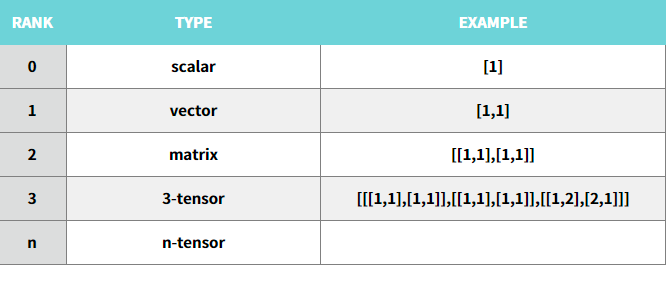

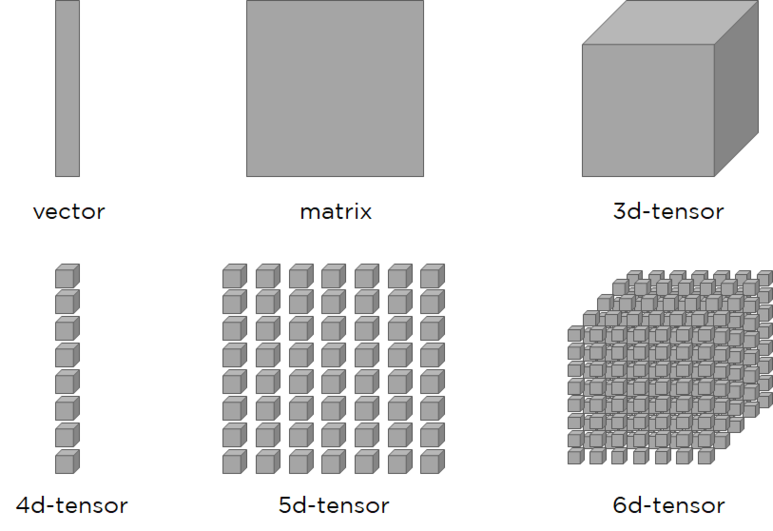

## Linear Regression

선혀회귀 문제

$y = ax + b$ 방정식의 x, y 데이터가 있으면 a가 1, b가 1임을 알 수 있다.

In [71]:
import matplotlib.pylab as plt
import tensorflow as tf

x_data = [1, 2, 3, 4, 5]
y_data = [2, 3, 4, 5, 6]

머신러닝으로 회귀 방정식의 절편과 계수를 찾는 것이다. a가 가중치 w, b가 편항을 알아내는 것이다. 

- 학습률: 보토 0.01~0.001 사이 값으로 설정. 학습률이 너무 크면 비용이 무한대로 늘어나는 오버슈팅 발생해 학습이 잘 이루어지지 않는다. 너무 작으면 학습 시간이 오래 걸린다.

In [98]:
w = tf.Variable(0.7)
b = tf.Variable(0.7)
learn_rate = 0.01

예측값 hyphothesis 와 실제값 y_data가 얼마나 차이가 나는지 수치화 한 것을 비용 또는 손실이라 한다. 비용 함수는 예측값과 실제값 차이를 제곱해서 평균 낸 값을 반환한다. 이를 오차제곱평균 (mean squared error, MSE)라고 한다.

비용함수는 아래로 볼록한 2차 방정식 그래프로 비용  함수의 최소값을 구하려면 임의의 (w, b) 값을 선택한 후 비용이 작게 나오는 방뱡으로 경사gradient를 타고 내려가면 된다. 이렇게 해서 그래프의 기울기를 구하면서 단계적으로 최소값을 구해가는 방식을 **경사 하강 알고리즘** Gradient Descent 라고 한다.

아래는 경사하강 알고리즘에 따라 1100회 학습을 수행해 비용함수 값이 최소가 되는 (w,b)를 구하는 코드이다.

```python
with tf.GradientTape() as tape:    # 내부계산과정을 테이프에 기록.
        hypothesis = w * x_data + b    # 예측값, 가설.
        cost = tf.reduce_mean((hypothesis - y_data)**2) # tf.losses.mean_squared_error(y, y_hat)
```

그리고 미분을 통해 손실/비용을 구한다. tf.reduce_mean()는 잔차의 평균을 구해서 새로운 비용을 산정한다.


아래는 주어진 x, y 데이터를 학습하는 과정을 보여주고 있다. 1100번 학습 해서 결과로 $h(x) = 1.00 x + 1.0$ 회귀직선을 찾고 있다. 파란 점이 데이터이고 빨간선이 회귀선이다. 

tf.GradientTape() 는 내부 계산과정을 tape에 기록해 두게 되고 나중에 tape.gradient() 함수를 이용해 미분값을 구할 수 있다.

In [99]:
print(f'step|    w|    b| cost')
print(f'----|-----|-----|-----')

t = [];

for i in range(1, 1101): 
    with tf.GradientTape() as tape:    # 내부계산과정을 테이프에 기록.
        hypothesis = w * x_data + b    # 예측값, 가설.
        cost = tf.reduce_mean((hypothesis - y_data)**2) # tf.losses.mean_squared_error(y, y_hat)
        
    dw, db = tape.gradient(cost, [w, b])  # 손실을 미분해 dw, db를 구한다.
    w.assign_sub(learn_rate * dw)         # a = a - b 와 동일한 연산
    b.assign_sub(learn_rate * db) 
    
    if i in [1, 3, 5, 10, 1000, 1100]:
        print(f"{i:4d}| {w.numpy():.2f}| {b.numpy():.2f}| {cost:.2f}")
        t.append({'no': i, 'h':  w * x_data + b, 'w': w.numpy(), 'b':b.numpy()})

step|    w|    b| cost
----|-----|-----|-----
   1| 0.78| 0.72| 1.62
   3| 0.90| 0.76| 0.55
   5| 0.96| 0.78| 0.19
  10| 1.03| 0.80| 0.02
1000| 1.00| 0.99| 0.00
1100| 1.00| 1.00| 0.00


In [100]:
for i, k in enumerate(t):
    print(k['no'], k['h'], k['w'])

1 tf.Tensor([1.5079999 2.2919998 3.076     3.86      4.644    ], shape=(5,), dtype=float32) 0.784
3 tf.Tensor([1.6536992 2.5506527 3.4476063 4.3445597 5.2415133], shape=(5,), dtype=float32) 0.8969536
5 tf.Tensor([1.7390077 2.701631  3.6642542 4.6268773 5.5895004], shape=(5,), dtype=float32) 0.96262324
10 tf.Tensor([1.8286636 2.858692  3.88872   4.9187484 5.9487767], shape=(5,), dtype=float32) 1.0300282
1000 tf.Tensor([1.9950738 2.996961  3.998848  5.0007353 6.0026226], shape=(5,), dtype=float32) 1.0018872
1100 tf.Tensor([1.996489  2.9978342 3.9991794 5.0005245 6.0018697], shape=(5,), dtype=float32) 1.0013452


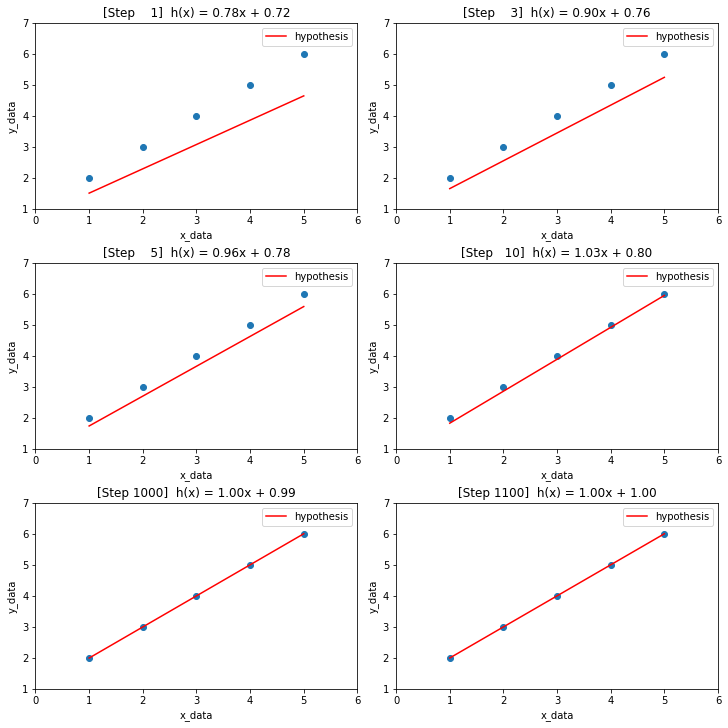

In [101]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), constrained_layout=True)

for i, k in enumerate(t):
    r,c = i//2, i % 2
    axes[r,c].set_title(f'[Step {k["no"]:4d}]  h(x) = { k["w"]:.2f}x + {k["b"]:.2f}')
    axes[r,c].plot(x_data, y_data, 'o') # ⑥
    axes[r,c].plot(x_data, k['h'], 'r', label='hypothesis') #
    axes[r,c].set_xlabel('x_data')
    axes[r,c].set_ylabel('y_data')
    axes[r,c].set_xlim(0, 6)
    axes[r,c].set_ylim(1, 7)
    axes[r,c].legend(loc='best')

# 간격
# plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

step|    w|    b| cost
----|-----|-----|-----
   1| 0.78| 0.72| 1.62


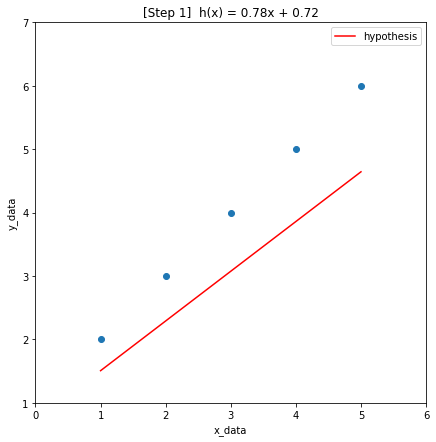

   3| 0.90| 0.76| 0.55


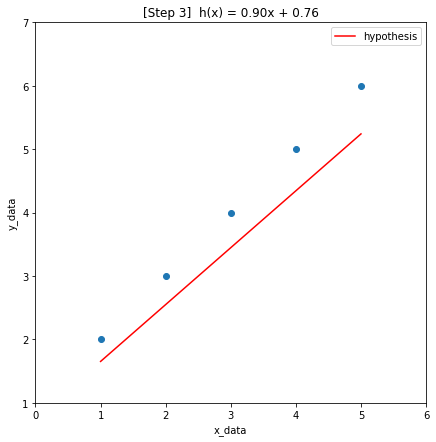

   5| 0.96| 0.78| 0.19


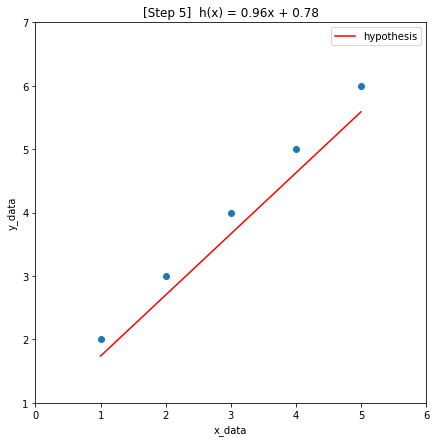

  10| 1.03| 0.80| 0.02


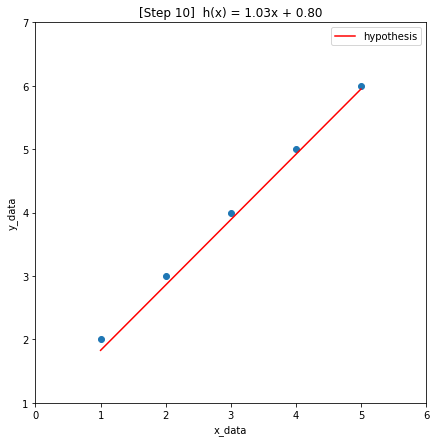

1000| 1.00| 0.99| 0.00


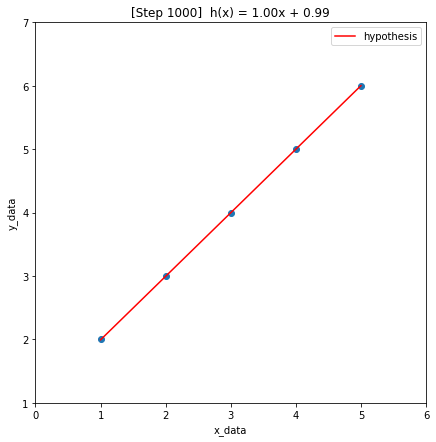

1100| 1.00| 1.00| 0.00


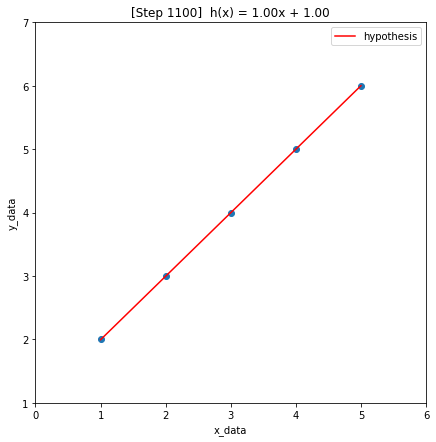

In [23]:
print(f'step|    w|    b| cost')
print(f'----|-----|-----|-----')

for i in range(1, 1101): 
    with tf.GradientTape() as tape:    # 내부계산과정을 테이프에 기록.
        hypothesis = w * x_data + b    # 예측값, 가설.
        cost = tf.reduce_mean((hypothesis - y_data)**2) # tf.losses.mean_squared_error(y, y_hat)
        
    dw, db = tape.gradient(cost, [w, b])  # 손실을 미분해 dw, db를 구한다.
    w.assign_sub(learn_rate * dw)         # a = a - b 와 동일한 연산
    b.assign_sub(learn_rate * db) 
    
    if i in [1, 3, 5, 10, 1000, 1100]:
        print(f"{i:4d}| {w.numpy():.2f}| {b.numpy():.2f}| {cost:.2f}")
        plt.figure(figsize=(7, 7))
        plt.title(f'[Step {i:d}]  h(x) = { w.numpy():.2f}x + {b.numpy():.2f}')
        plt.plot(x_data, y_data, 'o') # ⑥
        plt.plot(x_data, w * x_data + b, 'r', label='hypothesis') # ⑦
        plt.xlabel('x_data')
        plt.ylabel('y_data')
        plt.xlim(0, 6)
        plt.ylim(1, 7)
        plt.legend(loc='best')
        plt.show()

위 코드는 스텝이 증가함에 따라 비용이 줄어드는 결과를 그래프로 혹인할 수 있다. 그리고 1100회가 넘어서며 w, b값이 실제 값인 1.0에 도달하는 것을 확인할 수 있다. 이것은 텐서플로우로 학습을 1100회 수행해 `y = 1.0*x + 1.0` 직선을 찾아냈다는 것을 의미한다.

# RNN 주가예측

순환신경망을 사용해 주가예측 원리를 알아보자,

### 순환신경망

순환신경망은 이전 상태를 기억하고 학습하기 위해 주로 사용한다. 은닉층의 출력밧을 다음 학습 때 다시 입력에 추가하는 형태의 신경망이다.

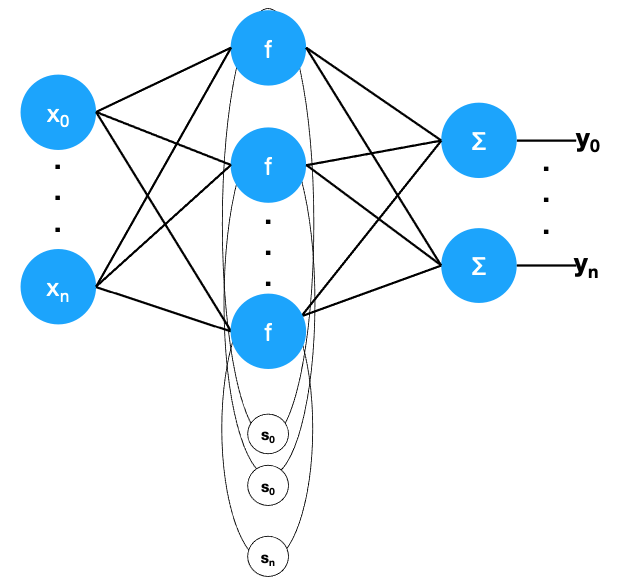

이런 특성을 활용해 음성, 문장 등 순차적 데이터에서 이전과 이후의 관계 파악에 유리해 학습에 사용된다. 대화는 이전 맥락을 이해하며 단어를 해석하기 때문에 동음이의어 '배' 같은 단어가 나와도 사람의 배인지, 바다의 배인지 판단이 된다. 순환시경망 같이 이전 결과를 다시 학습하는 알고리즘은 이런 특성에 맞게 개발되었다.

# RNN

순환신경망에서 뉴런은 셀(cell)이라 하고, 순환(recurrent)는 아래 그림 가이 이전 데이터의 학습된 셀의 상태 정보가 다음 데이터를 이용해 학습 시킬 때 다시 사용된다는 의미이다. 따라서 순차적인 시계열 데이터 처리에 적합하다.

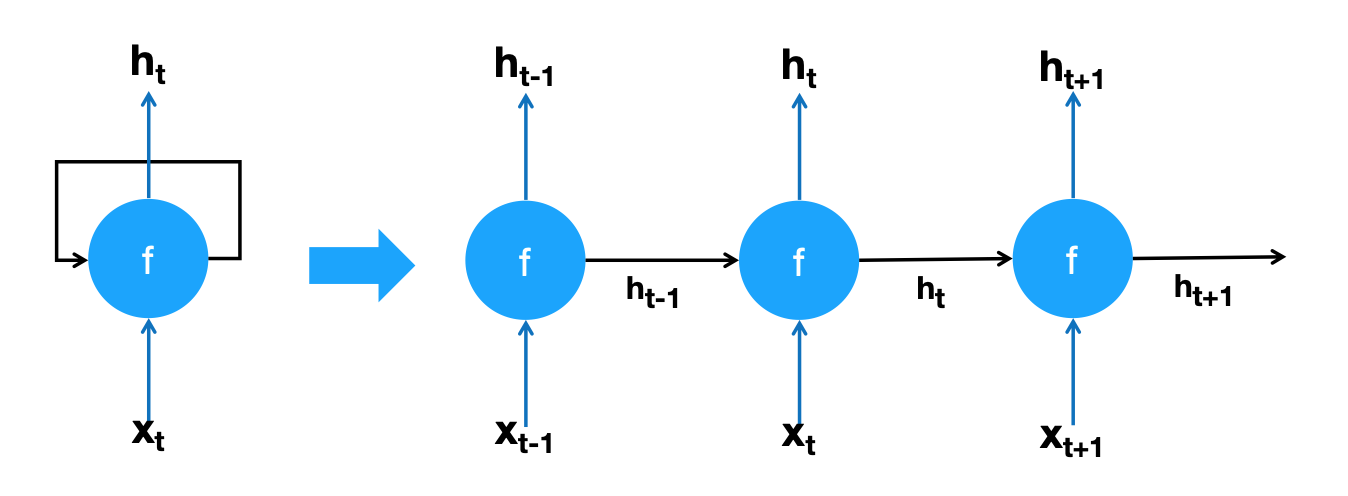

셀에서 만들어지는 상태 데이터를 은닉상태 hidden state라고 한다. 활성화함수로 쌍곡탄젠트 함수를 사용해 계산한다.

$$\text{Hidden State} = \tanh{W(h_{t-1}, x_{t}) + b }
$$

## 장단기기억 LTSM

기본 RNN은 단기기억 short-term memory 를 저장할 수 있지만, 데이터 사이의 모든 연관 정보를 파악하려면 기억을 더 길게 유지해야 한다. 이를 해결하고자 LTSM Long Short-Term Memroy 알고리즘이 만들어 졌다.

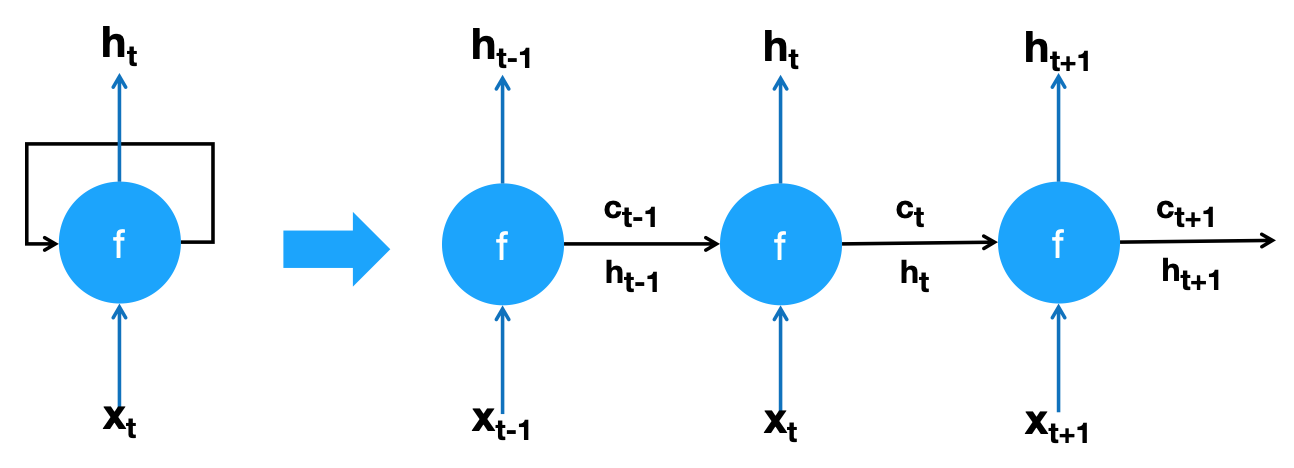



LTSM은 은닉상태와 더불어 셀상태를 계산하는데 셀 상태 계산에 망각 게이트forget gate와 입력 게이트를 이용한다. 망각게이트 $f_{t}$는 이전 셀 상태에서 지울 정보를 학습시킬 용도이다. 반면 입력 게이트($i_{t}$)는 새로운 데이터를 학습하는 용도이다. 망각게이트와 입력게이ㅡ 결과를 더하면 현재 셀 상태($c_t$)를 구할 수 있다. 최종적으로 은닉상태 ($h_t$)를 다음 같이 구한다.


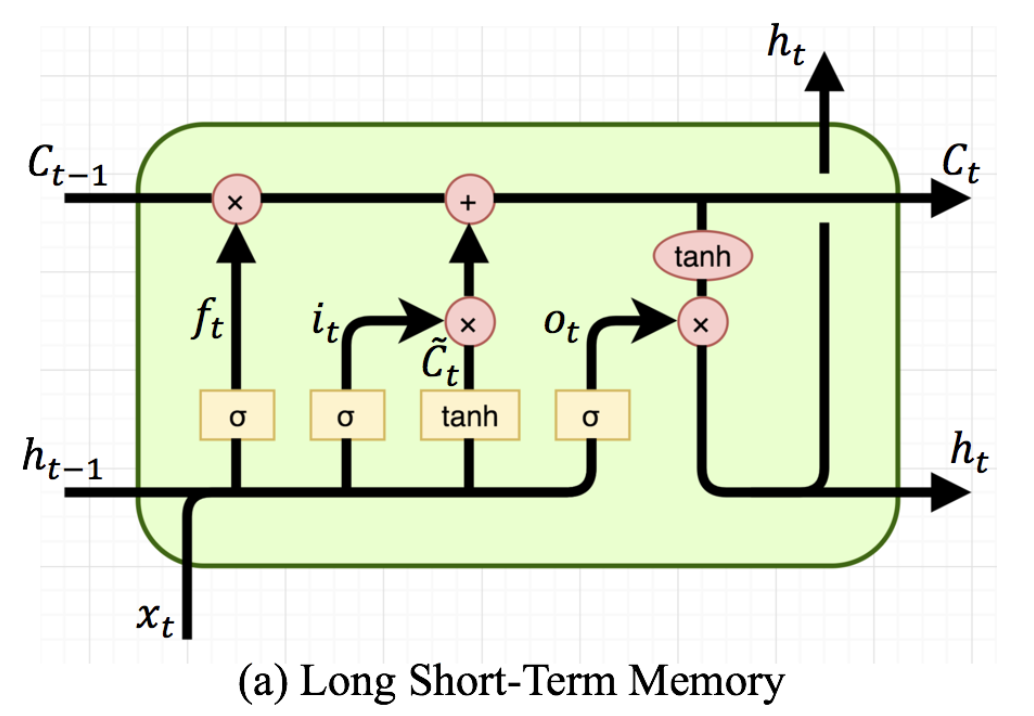

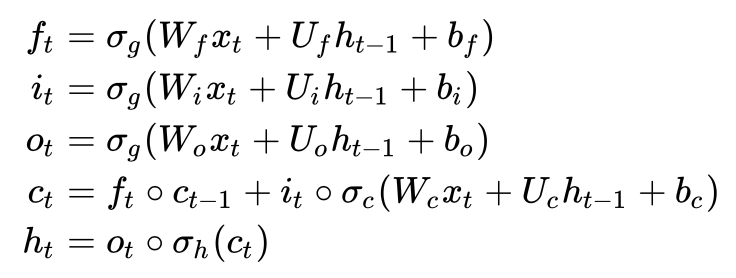

[https://docs.likejazz.com/lstm/]

## 주가예측

삼성전자 액면분할 상장일이던 2018-5-4 부터 2020-1-22 까지 OHLVC(시가-고가-저가-거래량-종가) 데이터를 사용한다.

In [1]:
import pandas as pd

li = []
chunks = pd.read_csv('./data/marcap-2020.csv.gz', chunksize=2000000)
for c in chunks:
    li.append(c)

df = pd.concat(li, axis=0, ignore_index=True)

In [2]:
df.head(3)

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,Date
0,005930,삼성전자,KOSPI,NaN,55200.0,2,-600.0,-1.08,55500.0,56000.0,55000.0,12993228.0,7.196632e+11,3.295320e+14,5969782550,STK,1,2020-01-02
1,000660,SK하이닉스,KOSPI,NaN,94700.0,1,600.0,0.64,96000.0,96200.0,94100.0,2342070.0,2.228414e+11,6.894182e+13,728002365,STK,2,2020-01-02
2,005935,삼성전자우,KOSPI,NaN,45600.0,1,200.0,0.44,45750.0,45950.0,45150.0,1512362.0,6.894333e+10,3.752363e+13,822886700,STK,3,2020-01-02


In [3]:
df_raw = df.loc[(df.Name == '삼성전자') & (df.Date > '2020-01-01') & (df.Date <= '2020-12-30')].copy()
df_raw.head()

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,Date
0,005930,삼성전자,KOSPI,NaN,55200.0,2,-600.0,-1.08,55500.0,56000.0,55000.0,12993228.0,7.196632e+11,3.295320e+14,5969782550,STK,1,2020-01-02
2359,005930,삼성전자,KOSPI,NaN,55500.0,1,300.0,0.54,56000.0,56600.0,54900.0,15422255.0,8.602067e+11,3.313229e+14,5969782550,STK,1,2020-01-03
4719,005930,삼성전자,KOSPI,NaN,55500.0,3,0.0,0.00,54900.0,55600.0,54600.0,10278951.0,5.674615e+11,3.313229e+14,5969782550,STK,1,2020-01-06
7079,005930,삼성전자,KOSPI,NaN,55800.0,1,300.0,0.54,55700.0,56400.0,55600.0,10009778.0,5.602267e+11,3.331139e+14,5969782550,STK,1,2020-01-07
9443,005930,삼성전자,KOSPI,NaN,56800.0,1,1000.0,1.79,56200.0,57400.0,55900.0,23501171.0,1.330939e+12,3.390836e+14,5969782550,STK,1,2020-01-08


In [4]:
df_raw.tail()

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,Date
573350,005930,삼성전자,KOSPI,NaN,73900.0,1,1600.0,2.21,72400.0,74000.0,72300.0,19411326.0,1.419205e+12,4.411669e+14,5969782550,STK,1,2020-12-23
575765,005930,삼성전자,KOSPI,NaN,77800.0,1,3900.0,5.28,74100.0,78800.0,74000.0,32502870.0,2.486987e+12,4.644491e+14,5969782550,STK,1,2020-12-24
578185,005930,삼성전자,KOSPI,NaN,78700.0,1,900.0,1.16,79000.0,80100.0,78200.0,40085044.0,3.172811e+12,4.698219e+14,5969782550,STK,1,2020-12-28
580608,005930,삼성전자,KOSPI,NaN,78300.0,2,-400.0,-0.51,78800.0,78900.0,77300.0,30339449.0,2.368814e+12,4.674340e+14,5969782550,STK,1,2020-12-29
583032,005930,삼성전자,KOSPI,NaN,81000.0,1,2700.0,3.45,77400.0,81300.0,77300.0,29417421.0,2.344317e+12,4.835524e+14,5969782550,STK,1,2020-12-30


In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
# from Investar import Analyzer

# mk = Analyzer.MarketDB()
# raw_df = mk.get_daily_price('삼성전자', '2018-05-04', '2020-01-22')

window_size = 10 
data_size = 5

# def MinMaxScaler(data):
#     """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
#     numerator = data - np.min(data, 0)
#     denominator = np.max(data, 0) - np.min(data, 0)
#     # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
#     return numerator / (denominator + 1e-7)


In [6]:
df  = df_raw[['Open','High','Low','Volume', 'Close']]
df.head(3)

,Open,High,Low,Volume,Close
0,55500.0,56000.0,55000.0,12993228.0,55200.0
2359,56000.0,56600.0,54900.0,15422255.0,55500.0
4719,54900.0,55600.0,54600.0,10278951.0,55500.0


In [7]:
df.isnull().sum()

Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [8]:
df.isna().sum()

Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
scaler.fit(df)

MinMaxScaler()

In [11]:
X_scaled = scaler.transform(df)
X_scaled[:10]

array([[0.3543956 , 0.32980132, 0.35376045, 0.08384141, 0.32987013],
       [0.36813187, 0.34569536, 0.35097493, 0.13173011, 0.33766234],
       [0.33791209, 0.3192053 , 0.34261838, 0.03032895, 0.33766234],
       [0.35989011, 0.34039735, 0.37047354, 0.02502215, 0.34545455],
       [0.37362637, 0.36688742, 0.37883008, 0.29100739, 0.37142857],
       [0.43406593, 0.3986755 , 0.42061281, 0.30286426, 0.41818182],
       [0.44505495, 0.42781457, 0.44568245, 0.14312381, 0.44155844],
       [0.46703297, 0.43576159, 0.46796657, 0.05162505, 0.45454545],
       [0.48901099, 0.46225166, 0.4902507 , 0.16098822, 0.45454545],
       [0.46428571, 0.42516556, 0.46239554, 0.10962295, 0.42857143]])

In [12]:
scaled_df = pd.DataFrame(X_scaled, columns=['Open','High','Low','Volume', 'Close'])
scaled_df.head(3)

,Open,High,Low,Volume,Close
0,0.354396,0.329801,0.353760,0.083841,0.329870
1,0.368132,0.345695,0.350975,0.131730,0.337662
2,0.337912,0.319205,0.342618,0.030329,0.337662


In [13]:
# dfx = raw_df[['open','high','low','volume', 'close']]
# dfx = MinMaxScaler(dfx)
# dfy = dfx[['close']]

X = scaled_df[['Open','High','Low','Volume']].values.tolist()
y = scaled_df[['Close']].values.tolist()

이전 10일 동안 OHLVC 데이터를 이용해 다음날 종가를 예측하도록 데이터세트를 준비한다.

In [14]:
data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

[[0.857142857142857, 0.8092715231788079, 0.863509749303621, 0.23900860482828307], [0.8653846153846152, 0.8198675496688741, 0.8662952646239552, 0.17293140495478354], [0.846153846153846, 0.7986754966887417, 0.8440111420612815, 0.30662266212221256], [0.8434065934065933, 0.7986754966887417, 0.8551532033426184, 0.17492161293751113], [0.8379120879120878, 0.790728476821192, 0.8272980501392757, 0.22922364559030473], [0.8214285714285714, 0.7854304635761589, 0.8300835654596099, 0.14913181149362265], [0.8186813186813187, 0.8066225165562912, 0.8356545961002784, 0.2103753618450191], [0.8653846153846152, 0.933774834437086, 0.883008356545961, 0.46847750725681275], [0.9999999999999998, 0.9682119205298012, 1.0, 0.6179614318638353], [0.9945054945054943, 0.9364238410596026, 0.9749303621169916, 0.4258252729956035]] -> [1.0]


훈련용과 테스트 데이터 세트 분리.

In [15]:
# rate_ = int(X.shape[0]*.7)
# X_train = X[0: rate_]
# X_test = y[rate_:]
# y_train = X[0: rate_]
# y_test = y[rate_:]

train_size = int(len(data_y) * 0.7)
X_train = np.array(data_x[0 : train_size])
y_train = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
X_test = np.array(data_x[train_size : len(data_x)])
y_test = np.array(data_y[train_size : len(data_y)])

1. 시퀀셜 모델
2. 10x4 크기의 LSTM 모델
3. 드롭아웃 10% - 드롭아웃층은 입력값 일부를 선택해 0으로 치환해 다음 층에 출력해 훈련 데이터를 늘이지 않고 과적합 방지
4. 출력층

In [16]:
data_size = 4

# 모델 생성
model = Sequential() #1
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, data_size))) #2
model.add(Dropout(0.1)) #3
model.add(LSTM(units=10, activation='relu')) 
model.add(Dropout(0.1)) 
model.add(Dense(units=1)) #4
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 10)            600       
_________________________________________________________________
dropout (Dropout)            (None, 10, 10)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 1,451
Trainable params: 1,451
Non-trainable params: 0
_________________________________________________________________


2021-10-30 16:59:56.758000: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


5. 최적화 도구는 아담, 손실함수 MSE
6. epochs: 전체 데이터 세트에 대한 학습 횟수, batch_size= 한번에 제공되는 훈련 데이터 수.

훈련결과를 보면 Epoch 47이후 손실 함수 결과가 더이상 줄어들지 않는 것을 알 수 있다. 더 이상 줄지 않는 것은 학습이 완료되었음을 알수 있다.

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error') # 5
model.fit(X_train, y_train, epochs=60, batch_size=30) # 6
pred_y = model.predict(X_test)

2021-10-30 17:00:01.534381: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/60
6/6 [==============================] - 2s 10ms/step - loss: 0.0724
Epoch 2/60
6/6 [==============================] - 0s 8ms/step - loss: 0.0603
Epoch 3/60
6/6 [==============================] - 0s 6ms/step - loss: 0.0437
Epoch 4/60
6/6 [==============================] - 0s 6ms/step - loss: 0.0310
Epoch 5/60
6/6 [==============================] - 0s 6ms/step - loss: 0.0191
Epoch 6/60
6/6 [==============================] - 0s 6ms/step - loss: 0.0111
Epoch 7/60
6/6 [==============================] - 0s 6ms/step - loss: 0.0144
Epoch 8/60
6/6 [==============================] - 0s 6ms/step - loss: 0.0103
Epoch 9/60
6/6 [==============================] - 0s 6ms/step - loss: 0.0111
Epoch 10/60
6/6 [==============================] - 0s 6ms/step - loss: 0.0100
Epoch 11/60
6/6 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 12/60
6/6 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 13/60
6/6 [==============================] - 0s 6ms/step - loss: 0

예측치와 실제 종가 비교



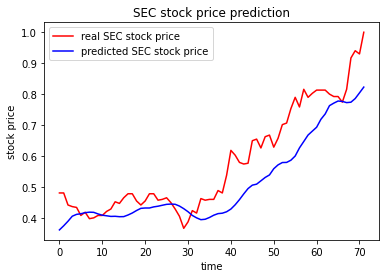

In [18]:

# Visualising the results
plt.figure()
plt.plot(y_test, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()